In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import random
from sklearn import datasets, linear_model
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
random.seed(0)

In [ ]:
A = datasets.make_spd_matrix(10)
b = np.random.rand(10, 1)
c = np.random.rand()

In [ ]:
norma = np.linalg.norm(A, ord=2)
normb = np.linalg.norm(b)


In [ ]:
v = 0.1 * np.ones((10, 1))

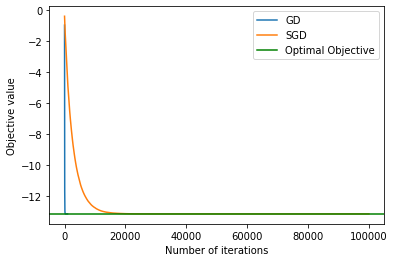

In [ ]:
step = 1 / ((2 * norma) + normb)
v = 0.1 * np.ones((10, 1))
x_gd = list(range(1, 1001))
y_gd = []
for i in x_gd:
  delta = 2 * np.matmul(A, v) - 2 * b
  v -= step * delta
  y_gd.append(np.matmul(np.matmul(v.T, A), v) - 2 * np.matmul(b.T, v) + c)

y_gd = np.reshape(y_gd, newshape=[1000])
# print(y)
plt.plot(x_gd, y_gd)

step = step / 100
v = 0.1 * np.ones((10, 1))
x_sgd = list(range(1, 100001))
y_sgd = []
for i in x_sgd:
  delta = 2 * np.matmul(A, v) - 2 * b
  noise = 0.5*np.random.randn(10)
  noise = np.reshape(noise, newshape=[10, 1])
  v -= step * (delta + noise)
  y_sgd.append(np.matmul(np.matmul(v.T, A), v) - 2 * np.matmul(b.T, v) + c)

y_sgd = np.reshape(y_sgd, newshape=[100000])
plt.plot(x_sgd, y_sgd)

minv = np.matmul(np.linalg.inv(A), b)
minimum = np.matmul(np.matmul(minv.T, A), minv) - 2 * np.matmul(b.T, minv) + c
# print(minimum)
plt.axhline(y = minimum, color='green')
plt.xlabel("Number of iterations")
plt.ylabel("Objective value")
plt.legend(["GD", "SGD", "Optimal Objective"])
plt.show()